In [1]:
#Problem Statement:To predict which customer is more likely to purchase the newly introduced travel package and also to known which customers should be targeted more.

In [2]:
import numpy as np
import pandas as pd
from numpy import random
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

import warnings
warnings.filterwarnings('ignore')

# Reading the DataSet

In [3]:
t=pd.read_csv(r"C:\Users\Admin\Documents\Project_1\Travel\Travel.csv")
t

,CustomerID,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
0,200000,1,41.0,Self Enquiry,3,6.0,Salaried,Female,3,3.0,Deluxe,3.0,Single,1.0,1,2,1,0.0,Manager,20993.0
1,200001,0,49.0,Company Invited,1,14.0,Salaried,Male,3,4.0,Deluxe,4.0,Divorced,2.0,0,3,1,2.0,Manager,20130.0
2,200002,1,37.0,Self Enquiry,1,8.0,Free Lancer,Male,3,4.0,Basic,3.0,Single,7.0,1,3,0,0.0,Executive,17090.0
3,200003,0,33.0,Company Invited,1,9.0,Salaried,Female,2,3.0,Basic,3.0,Divorced,2.0,1,5,1,1.0,Executive,17909.0
4,200004,0,NaN,Self Enquiry,1,8.0,Small Business,Male,2,3.0,Basic,4.0,Divorced,1.0,0,5,1,0.0,Executive,18468.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4883,204883,1,49.0,Self Enquiry,3,9.0,Small Business,Male,3,5.0,Deluxe,4.0,Unmarried,2.0,1,1,1,1.0,Manager,26576.0
4884,204884,1,28.0,Company Invited,1,31.0,Salaried,Male,4,5.0,Basic,3.0,Single,3.0,1,3,1,2.0,Executive,21212.0
4885,204885,1,52.0,Self Enquiry,3,17.0,Salaried,Female,4,4.0,Standard,4.0,Married,7.0,0,1,1,3.0,Senior Manager,31820.0
4886,204886,1,19.0,Self Enquiry,3,16.0,Small Business,Male,3,4.0,Basic,3.0,Single,3.0,0,5,0,2.0,Executive,20289.0


# Basic information of Dataset

In [4]:
# Product taken is my target column and my target column is categorical
# The ML Model used will be Classification Model
# The data is in binary form (0,1)

In [5]:
t.shape

(4888, 20)

In [6]:
t.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4888 entries, 0 to 4887
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CustomerID                4888 non-null   int64  
 1   ProdTaken                 4888 non-null   int64  
 2   Age                       4662 non-null   float64
 3   TypeofContact             4863 non-null   object 
 4   CityTier                  4888 non-null   int64  
 5   DurationOfPitch           4637 non-null   float64
 6   Occupation                4888 non-null   object 
 7   Gender                    4888 non-null   object 
 8   NumberOfPersonVisiting    4888 non-null   int64  
 9   NumberOfFollowups         4843 non-null   float64
 10  ProductPitched            4888 non-null   object 
 11  PreferredPropertyStar     4862 non-null   float64
 12  MaritalStatus             4888 non-null   object 
 13  NumberOfTrips             4748 non-null   float64
 14  Passport

In [7]:
t.describe(include='all')

,CustomerID,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
count,4888.000000,4888.000000,4662.000000,4863,4888.000000,4637.000000,4888,4888,4888.000000,4843.000000,4888,4862.000000,4888,4748.000000,4888.000000,4888.000000,4888.000000,4822.000000,4888,4655.000000
unique,NaN,NaN,NaN,2,NaN,NaN,4,3,NaN,NaN,5,NaN,4,NaN,NaN,NaN,NaN,NaN,5,NaN
top,NaN,NaN,NaN,Self Enquiry,NaN,NaN,Salaried,Male,NaN,NaN,Basic,NaN,Married,NaN,NaN,NaN,NaN,NaN,Executive,NaN
freq,NaN,NaN,NaN,3444,NaN,NaN,2368,2916,NaN,NaN,1842,NaN,2340,NaN,NaN,NaN,NaN,NaN,1842,NaN
mean,202443.500000,0.188216,37.622265,NaN,1.654255,15.490835,NaN,NaN,2.905074,3.708445,NaN,3.581037,NaN,3.236521,0.290917,3.078151,0.620295,1.187267,NaN,23619.853491
std,1411.188388,0.390925,9.316387,NaN,0.916583,8.519643,NaN,NaN,0.724891,1.002509,NaN,0.798009,NaN,1.849019,0.454232,1.365792,0.485363,0.857861,NaN,5380.698361
min,200000.000000,0.000000,18.000000,NaN,1.000000,5.000000,NaN,NaN,1.000000,1.000000,NaN,3.000000,NaN,1.000000,0.000000,1.000000,0.000000,0.000000,NaN,1000.000000
25%,201221.750000,0.000000,31.000000,NaN,1.000000,9.000000,NaN,NaN,2.000000,3.000000,NaN,3.000000,NaN,2.000000,0.000000,2.000000,0.000000,1.000000,NaN,20346.000000
50%,202443.500000,0.000000,36.000000,NaN,1.000000,13.000000,NaN,NaN,3.000000,4.000000,NaN,3.000000,NaN,3.000000,0.000000,3.000000,1.000000,1.000000,NaN,22347.000000
75%,203665.250000,0.000000,44.000000,NaN,3.000000,20.000000,NaN,NaN,3.000000,4.000000,NaN,4.000000,NaN,4.000000,1.000000,4.000000,1.000000,2.000000,NaN,25571.000000


# Drop the unique partten column

In [8]:
t_id=t['CustomerID']
t_id

0       200000
1       200001
2       200002
3       200003
4       200004
         ...  
4883    204883
4884    204884
4885    204885
4886    204886
4887    204887
Name: CustomerID, Length: 4888, dtype: int64

*Drop the customerID column*

In [9]:
t1=t.drop(['CustomerID'],axis=1)
t1

,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
0,1,41.0,Self Enquiry,3,6.0,Salaried,Female,3,3.0,Deluxe,3.0,Single,1.0,1,2,1,0.0,Manager,20993.0
1,0,49.0,Company Invited,1,14.0,Salaried,Male,3,4.0,Deluxe,4.0,Divorced,2.0,0,3,1,2.0,Manager,20130.0
2,1,37.0,Self Enquiry,1,8.0,Free Lancer,Male,3,4.0,Basic,3.0,Single,7.0,1,3,0,0.0,Executive,17090.0
3,0,33.0,Company Invited,1,9.0,Salaried,Female,2,3.0,Basic,3.0,Divorced,2.0,1,5,1,1.0,Executive,17909.0
4,0,NaN,Self Enquiry,1,8.0,Small Business,Male,2,3.0,Basic,4.0,Divorced,1.0,0,5,1,0.0,Executive,18468.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4883,1,49.0,Self Enquiry,3,9.0,Small Business,Male,3,5.0,Deluxe,4.0,Unmarried,2.0,1,1,1,1.0,Manager,26576.0
4884,1,28.0,Company Invited,1,31.0,Salaried,Male,4,5.0,Basic,3.0,Single,3.0,1,3,1,2.0,Executive,21212.0
4885,1,52.0,Self Enquiry,3,17.0,Salaried,Female,4,4.0,Standard,4.0,Married,7.0,0,1,1,3.0,Senior Manager,31820.0
4886,1,19.0,Self Enquiry,3,16.0,Small Business,Male,3,4.0,Basic,3.0,Single,3.0,0,5,0,2.0,Executive,20289.0


# Cleaning

## Missing value treatment

In [10]:
t1.isnull().sum()

ProdTaken                     0
Age                         226
TypeofContact                25
CityTier                      0
DurationOfPitch             251
Occupation                    0
Gender                        0
NumberOfPersonVisiting        0
NumberOfFollowups            45
ProductPitched                0
PreferredPropertyStar        26
MaritalStatus                 0
NumberOfTrips               140
Passport                      0
PitchSatisfactionScore        0
OwnCar                        0
NumberOfChildrenVisiting     66
Designation                   0
MonthlyIncome               233
dtype: int64

*There are some missing value present in the dataSet*

In [11]:
#Imputaing the missing values
t1.Age=t1.Age.fillna(61.0)
t1.TypeofContact=t1.TypeofContact.fillna('Company Invited')
t1.DurationOfPitch=t1.DurationOfPitch.fillna(127.0)
t1.NumberOfFollowups=t1.NumberOfFollowups.fillna(6.0)
t1.PreferredPropertyStar=t1.PreferredPropertyStar.fillna(4.0)
t1.NumberOfTrips=t1.NumberOfTrips.fillna(22.0)
t1.NumberOfChildrenVisiting=t1.NumberOfChildrenVisiting.fillna(3.0)
t1.MonthlyIncome=t1.MonthlyIncome.fillna(t1.MonthlyIncome.median())

In [12]:
t1.isnull().sum()

ProdTaken                   0
Age                         0
TypeofContact               0
CityTier                    0
DurationOfPitch             0
Occupation                  0
Gender                      0
NumberOfPersonVisiting      0
NumberOfFollowups           0
ProductPitched              0
PreferredPropertyStar       0
MaritalStatus               0
NumberOfTrips               0
Passport                    0
PitchSatisfactionScore      0
OwnCar                      0
NumberOfChildrenVisiting    0
Designation                 0
MonthlyIncome               0
dtype: int64

## Dtypes

In [13]:
t1.dtypes

ProdTaken                     int64
Age                         float64
TypeofContact                object
CityTier                      int64
DurationOfPitch             float64
Occupation                   object
Gender                       object
NumberOfPersonVisiting        int64
NumberOfFollowups           float64
ProductPitched               object
PreferredPropertyStar       float64
MaritalStatus                object
NumberOfTrips               float64
Passport                      int64
PitchSatisfactionScore        int64
OwnCar                        int64
NumberOfChildrenVisiting    float64
Designation                  object
MonthlyIncome               float64
dtype: object

In [14]:
t1.TypeofContact=le.fit_transform(t1.TypeofContact)
t1.Occupation=le.fit_transform(t1.Occupation)
t1.Gender=le.fit_transform(t1.Gender)
t1.ProductPitched=le.fit_transform(t1.ProductPitched)
t1.MaritalStatus=le.fit_transform(t1.MaritalStatus)
t1.Designation=le.fit_transform(t1.Designation)

In [15]:
t1.dtypes

ProdTaken                     int64
Age                         float64
TypeofContact                 int32
CityTier                      int64
DurationOfPitch             float64
Occupation                    int32
Gender                        int32
NumberOfPersonVisiting        int64
NumberOfFollowups           float64
ProductPitched                int32
PreferredPropertyStar       float64
MaritalStatus                 int32
NumberOfTrips               float64
Passport                      int64
PitchSatisfactionScore        int64
OwnCar                        int64
NumberOfChildrenVisiting    float64
Designation                   int32
MonthlyIncome               float64
dtype: object

# EDA-Exploratory Data Analysis

In [16]:
cr=t1.corr()
cr

,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
ProdTaken,1.000000,-0.124746,-0.047283,0.086852,0.019335,-0.041042,0.031376,0.009627,0.108530,-0.161262,0.099497,0.147186,-0.029485,0.260844,0.051394,-0.011508,0.001310,-0.097388,-0.126420
Age,-0.124746,1.000000,0.037927,-0.046246,-0.090047,0.020553,-0.020549,-0.073386,-0.061094,0.324706,-0.001831,-0.094479,0.186766,0.030986,0.024134,0.043553,-0.034171,0.117907,0.345990
TypeofContact,-0.047283,0.037927,1.000000,-0.009421,-0.078313,-0.004761,0.011812,0.005522,-0.012529,0.006780,0.035043,-0.030406,0.014309,0.007981,-0.015811,0.004348,0.011121,0.006005,0.029255
CityTier,0.086852,-0.046246,-0.009421,1.000000,0.043244,0.131834,-0.037895,-0.001671,0.029266,0.141485,-0.009609,0.035707,-0.038589,0.001793,-0.042160,0.003817,0.001487,0.120852,0.051790
DurationOfPitch,0.019335,-0.090047,-0.078313,0.043244,1.000000,0.040792,0.002171,-0.122981,-0.098212,-0.064716,-0.010339,-0.030513,-0.070096,-0.009077,-0.004510,0.012717,-0.105237,-0.002302,-0.120793
Occupation,-0.041042,0.020553,-0.004761,0.131834,0.040792,1.000000,-0.012598,0.003221,-0.011612,0.034749,0.023033,-0.021764,0.015486,0.003653,-0.053928,-0.036508,-0.000929,0.027437,0.034140
Gender,0.031376,-0.020549,0.011812,-0.037895,0.002171,-0.012598,1.000000,-0.017719,-0.013782,-0.080829,-0.014504,-0.132556,0.023382,-0.030960,0.006257,-0.023223,0.002255,-0.044082,-0.051517
NumberOfPersonVisiting,0.009627,-0.073386,0.005522,-0.001671,-0.122981,0.003221,-0.017719,1.000000,0.306572,-0.021631,0.036021,0.005537,0.190880,0.011177,-0.019581,0.010362,0.596265,-0.005781,0.198449
NumberOfFollowups,0.108530,-0.061094,-0.012529,0.029266,-0.098212,-0.011612,-0.013782,0.306572,1.000000,-0.002061,-0.020099,0.077423,0.122889,0.000702,0.006792,0.012805,0.266630,0.046043,0.159608
ProductPitched,-0.161262,0.324706,0.006780,0.141485,-0.064716,0.034749,-0.080829,-0.021631,-0.002061,1.000000,0.015150,-0.047460,0.200002,-0.013152,0.034038,0.070384,0.026300,0.330022,0.694559


<AxesSubplot:>

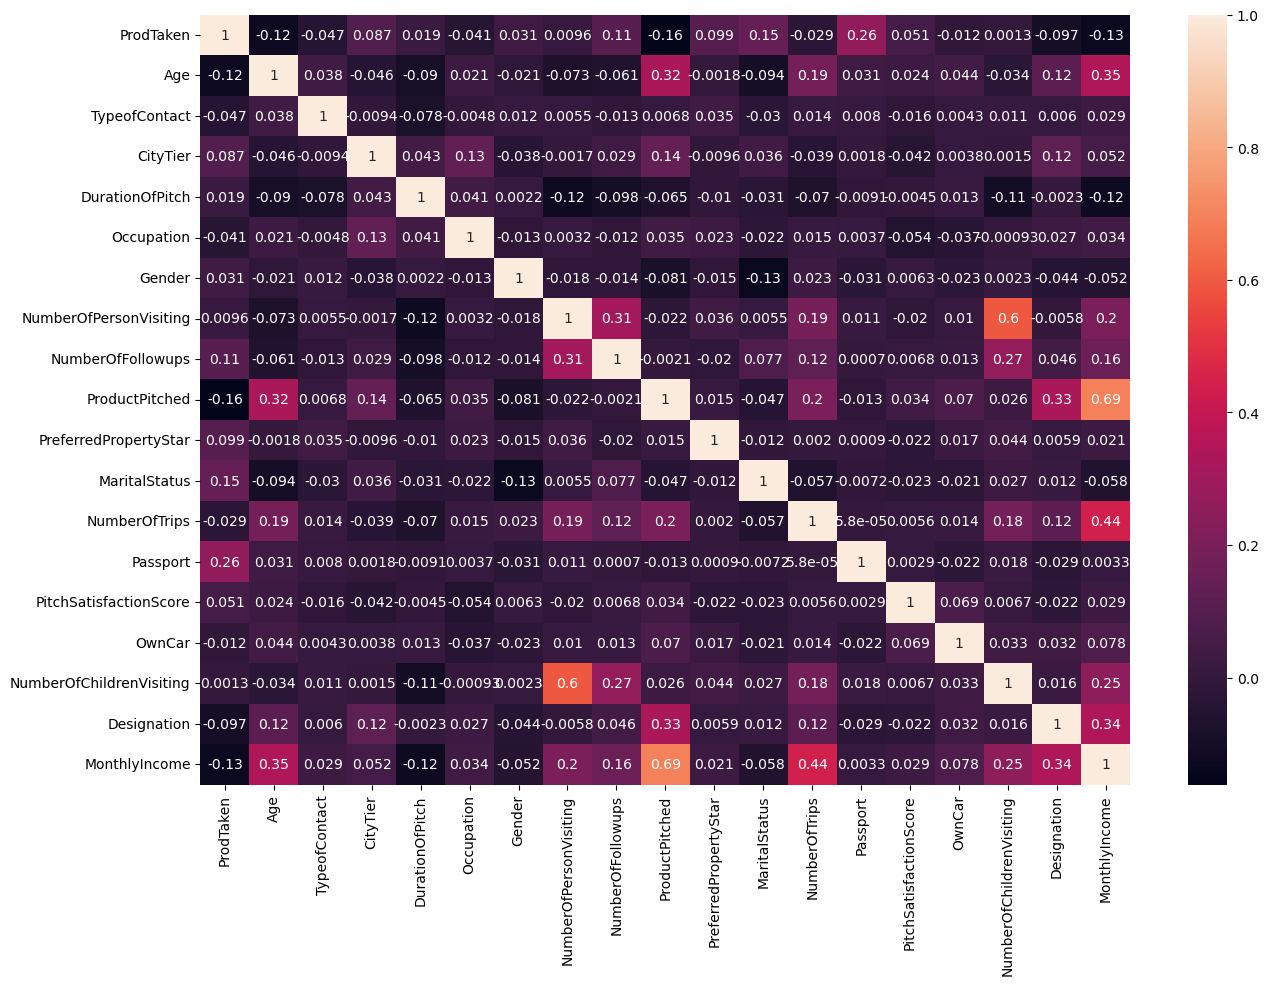

In [17]:
plt.figure(figsize=(15,10))
sns.heatmap(cr,annot=True)

# Visualization

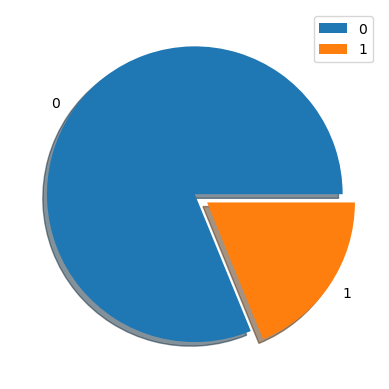

In [18]:
c0,c1=t1["ProdTaken"].value_counts()
prod=[c0,c1]
l=[0,1]
e=[0,0.1]
plt.pie(prod,labels=l,explode=e,shadow=True)
plt.legend()
plt.show()


In [19]:
# from the given data we can conclude that the most of the people are rejected the package whic is recommended

In [20]:
x=pd.crosstab(t["ProductPitched"],t["TypeofContact"])
x

TypeofContact,Company Invited,Self Enquiry
ProductPitched,,
Basic,516,1316
Deluxe,541,1176
King,48,182
Standard,218,524
Super Deluxe,96,246


<Figure size 2500x2500 with 0 Axes>

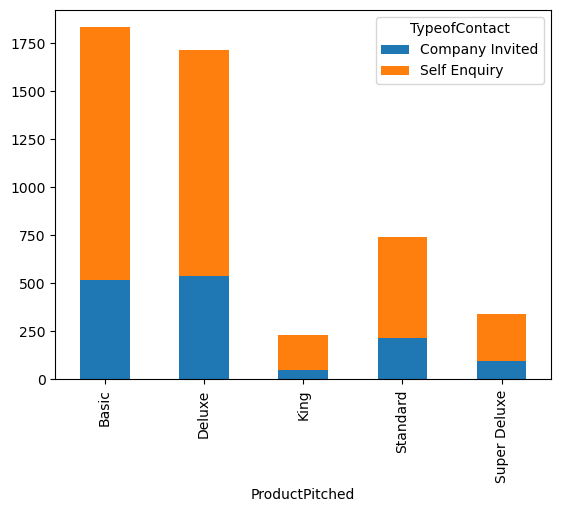

In [21]:
fig=plt.figure(figsize=(25,25))
x.plot(kind="bar",stacked=True)
plt.show()

In [22]:
# from the avbove graph the self enquire people mostly picking the basic and deluxe package are taken more
# king product pitched(package) is selected by rare persons

<AxesSubplot:xlabel='Designation', ylabel='count'>

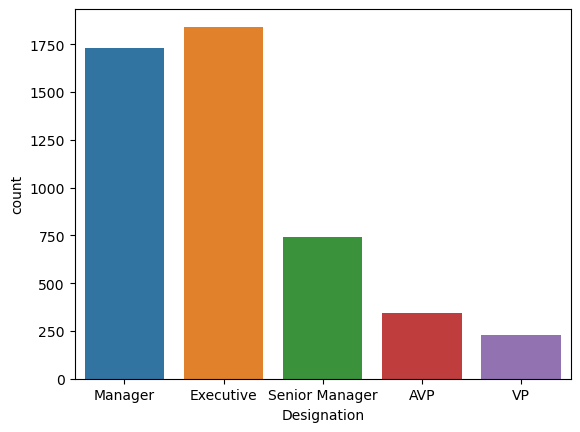

In [23]:
#Designation,
sns.countplot("Designation",data=t)

In [24]:
x2=t.groupby("Gender").MonthlyIncome.mean()

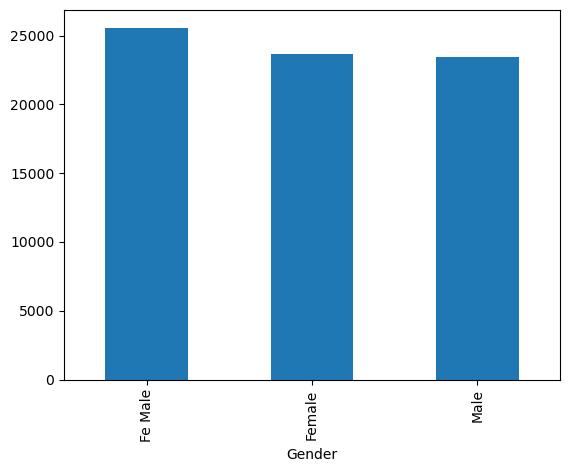

In [25]:
x2.plot(kind="bar",stacked=True)
plt.show()

In [26]:
# from the graph the average income of traveler is ablove 20k 

In [27]:
x3=pd.crosstab(t["NumberOfTrips"],t["MaritalStatus"])


<Figure size 2500x2500 with 0 Axes>

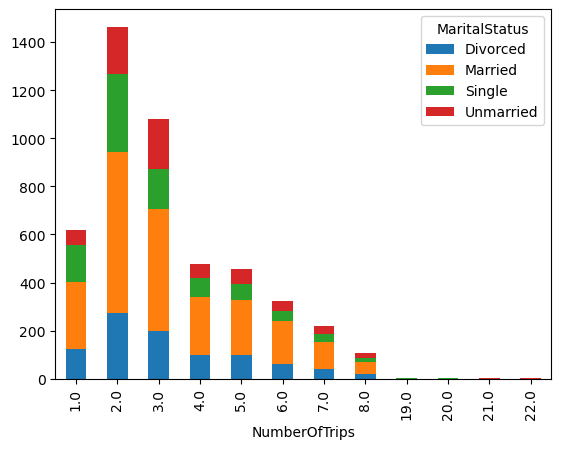

In [28]:
fig=plt.figure(figsize=(25,25))
x3.plot(kind="bar",stacked=True)
plt.show()

In [29]:
# the maximum number of trips that are taken by the traveler are married and no.of trips taken are 2 to 3 trips

<AxesSubplot:xlabel='NumberOfTrips', ylabel='count'>

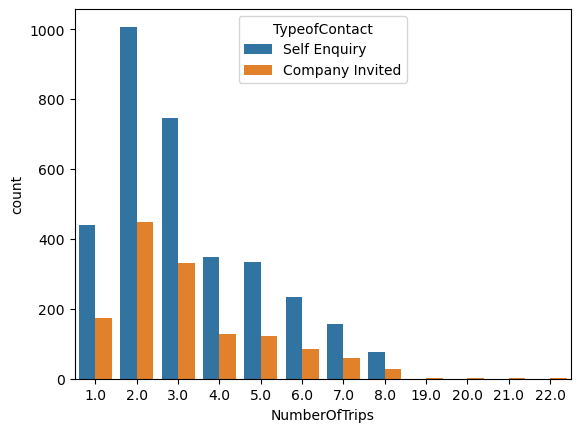

In [30]:
sns.countplot('NumberOfTrips',data=t,hue='TypeofContact')

# Base Model

In [31]:
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import roc_curve
from sklearn.metrics import precision_recall_curve

In [32]:
t1.head(2)

,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
0,1,41.0,1,3,6.0,2,1,3,3.0,1,3.0,2,1.0,1,2,1,0.0,2,20993.0
1,0,49.0,0,1,14.0,2,2,3,4.0,1,4.0,0,2.0,0,3,1,2.0,2,20130.0


In [33]:
#splitting the dependent and independent variables
y=t1.iloc[:,0]
x=t1.iloc[:,1:19]

In [34]:
x.shape,y.shape

((4888, 18), (4888,))

In [35]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=100)

In [36]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((3910, 18), (978, 18), (3910,), (978,))

# Logistic Regression

In [37]:
from sklearn.linear_model import LogisticRegression
lg=LogisticRegression()

In [38]:
lg.fit(x_train,y_train)

LogisticRegression()

In [39]:
lg_p=lg.predict(x_test)

In [40]:
lg_m=confusion_matrix(lg_p,y_test)
lg_m

array([[787, 171],
       [  3,  17]], dtype=int64)

In [41]:
lg_acc=lg_m.diagonal().sum()/lg_m.sum()*100
lg_acc

82.20858895705521

In [42]:
lg_f1=f1_score(lg_p,y_test)
lg_pe=precision_score(lg_p,y_test)
lg_re=recall_score(lg_p,y_test)

In [43]:
print(classification_report(lg_p,y_test))

              precision    recall  f1-score   support

           0       1.00      0.82      0.90       958
           1       0.09      0.85      0.16        20

    accuracy                           0.82       978
   macro avg       0.54      0.84      0.53       978
weighted avg       0.98      0.82      0.89       978



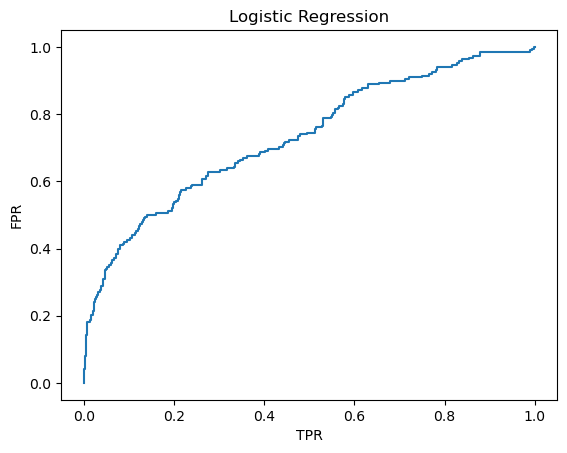

In [44]:
lg_prob=lg.predict_proba(x_test)
lg_df=pd.DataFrame(lg_prob)
lg_fpr,lg_tpr,lg_threshold=roc_curve(y_test,lg_df.iloc[:,1])
plt.plot(lg_fpr,lg_tpr)
plt.title('Logistic Regression')
plt.xlabel('TPR')
plt.ylabel('FPR')
plt.show()

# Decision Tree

In [45]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()

In [46]:
dt.fit(x_train,y_train)

DecisionTreeClassifier()

In [47]:
dt_p=dt.predict(x_test)

In [48]:
dt_cf=confusion_matrix(dt_p,y_test)
dt_cf

array([[740,  34],
       [ 50, 154]], dtype=int64)

In [49]:
dt_acc=dt_cf.diagonal().sum()/dt_cf.sum()*100
dt_acc

91.41104294478528

In [50]:
dt_f1=f1_score(dt_p,y_test)
dt_pe=precision_score(dt_p,y_test)
dt_re=recall_score(dt_p,y_test)

In [51]:
print(classification_report(dt_p,y_test))

              precision    recall  f1-score   support

           0       0.94      0.96      0.95       774
           1       0.82      0.75      0.79       204

    accuracy                           0.91       978
   macro avg       0.88      0.86      0.87       978
weighted avg       0.91      0.91      0.91       978



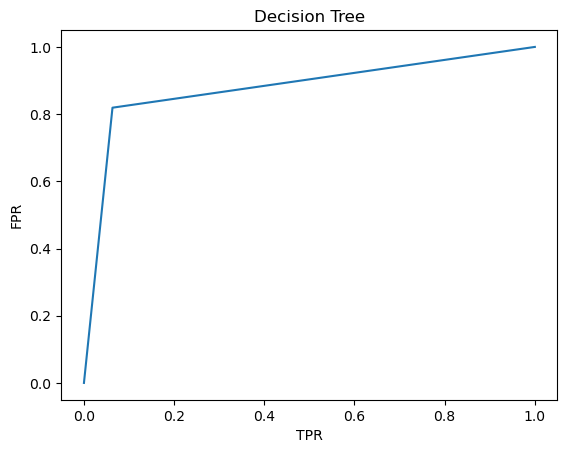

In [52]:
dt_prob=dt.predict_proba(x_test)
dt_df=pd.DataFrame(dt_prob)
dt_fpr,dt_tpr,dt_threshold=roc_curve(y_test,dt_df.iloc[:,1])
plt.plot(dt_fpr,dt_tpr)
plt.title('Decision Tree')
plt.xlabel('TPR')
plt.ylabel('FPR')
plt.show()

# Random Forest

In [53]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()

In [54]:
rf.fit(x_train,y_train)

RandomForestClassifier()

In [55]:
rf_p=rf.predict(x_test)

In [56]:
rf_cf=confusion_matrix(rf_p,y_test)
rf_cf

array([[779,  61],
       [ 11, 127]], dtype=int64)

In [57]:
rf_acc=rf_cf.diagonal().sum()/rf_cf.sum()*100
rf_acc

92.63803680981594

In [58]:
rf_f1=f1_score(rf_p,y_test)
rf_pe=precision_score(rf_p,y_test)
rf_re=recall_score(rf_p,y_test)

In [59]:
print(classification_report(rf_p,y_test))

              precision    recall  f1-score   support

           0       0.99      0.93      0.96       840
           1       0.68      0.92      0.78       138

    accuracy                           0.93       978
   macro avg       0.83      0.92      0.87       978
weighted avg       0.94      0.93      0.93       978



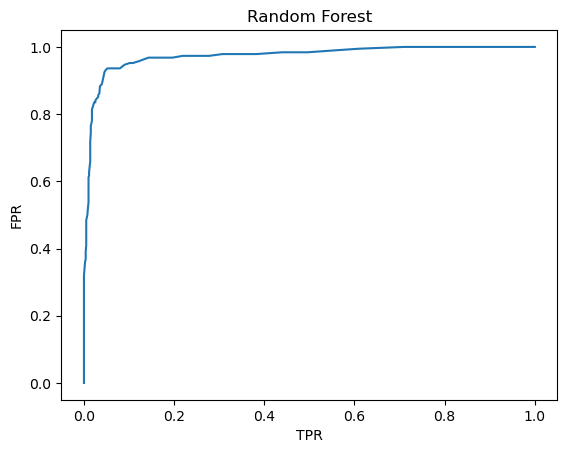

In [60]:
rf_prob=rf.predict_proba(x_test)
rf_df=pd.DataFrame(rf_prob)
rf_fpr,rf_tpr,rf_threshold=roc_curve(y_test,rf_df.iloc[:,1])
plt.plot(rf_fpr,rf_tpr)
plt.title('Random Forest')
plt.xlabel('TPR')
plt.ylabel('FPR')
plt.show()

# Adaboost

In [61]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

In [62]:
adbo=AdaBoostClassifier(DecisionTreeClassifier(),n_estimators=5)

In [63]:
adbo.fit(x_train,y_train)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(), n_estimators=5)

In [64]:
ad_p=adbo.predict(x_test)

In [65]:
ad_cf=confusion_matrix(ad_p,y_test)
ad_cf

array([[741,  35],
       [ 49, 153]], dtype=int64)

In [66]:
ad_acc=ad_cf.diagonal().sum()/ad_cf.sum()*100
ad_acc

91.41104294478528

In [67]:
ad_f1=f1_score(ad_p,y_test)
ad_pe=precision_score(ad_p,y_test)
ad_re=recall_score(ad_p,y_test)

In [68]:
print(classification_report(ad_p,y_test))

              precision    recall  f1-score   support

           0       0.94      0.95      0.95       776
           1       0.81      0.76      0.78       202

    accuracy                           0.91       978
   macro avg       0.88      0.86      0.87       978
weighted avg       0.91      0.91      0.91       978



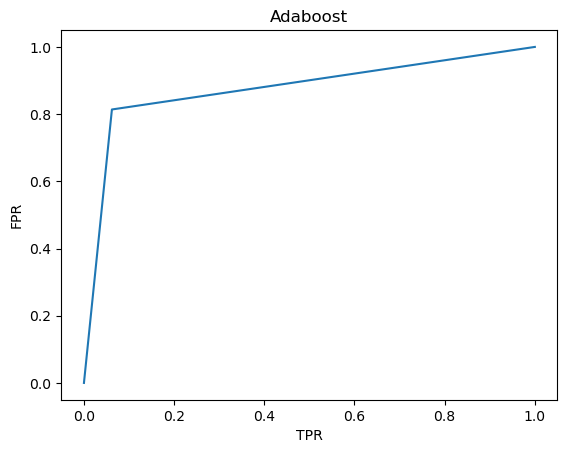

In [69]:
ad_prob=adbo.predict_proba(x_test)
ad_df=pd.DataFrame(ad_prob)
ad_fpr,ad_tpr,ad_threshold=roc_curve(y_test,ad_df.iloc[:,1])
plt.plot(ad_fpr,ad_tpr)
plt.title('Adaboost')
plt.xlabel('TPR')
plt.ylabel('FPR')
plt.show()

# xgboost

In [70]:
from xgboost import XGBClassifier

In [71]:
xgb=XGBClassifier()

In [72]:
xgb.fit(x_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [73]:
xgb_p=xgb.predict(x_test)

In [74]:
xgb_cf=confusion_matrix(xgb_p,y_test)
xgb_cf

array([[777,  43],
       [ 13, 145]], dtype=int64)

In [75]:
xgb_acc=xgb_cf.diagonal().sum()/xgb_cf.sum()*100
xgb_acc

94.27402862985686

In [76]:
xgb_f1=f1_score(xgb_p,y_test)
xgb_pe=precision_score(xgb_p,y_test)
xgb_re=recall_score(xgb_p,y_test)

In [77]:
print(classification_report(xgb_p,y_test))

              precision    recall  f1-score   support

           0       0.98      0.95      0.97       820
           1       0.77      0.92      0.84       158

    accuracy                           0.94       978
   macro avg       0.88      0.93      0.90       978
weighted avg       0.95      0.94      0.94       978



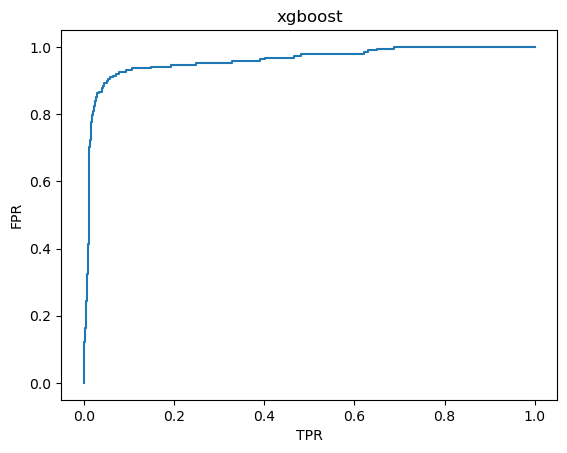

In [78]:
xg_prob=xgb.predict_proba(x_test)
xg_df=pd.DataFrame(xg_prob)
xg_fpr,xg_tpr,xg_threshold=roc_curve(y_test,xg_df.iloc[:,1])
plt.plot(xg_fpr,xg_tpr)
plt.title('xgboost')
plt.xlabel('TPR')
plt.ylabel('FPR')
plt.show()

# support vector mechine

In [79]:
from sklearn.svm import SVC
svc=SVC(probability=True)

In [80]:
svc.fit(x_train,y_train)

SVC(probability=True)

In [81]:
s_p=svc.predict(x_test)

In [82]:
cs=confusion_matrix(s_p,y_test)

In [83]:
acc_s=cs.diagonal().sum()/cs.sum()*100
acc_s

80.77709611451944

In [84]:
s_f1=f1_score(s_p,y_test)
s_pe=precision_score(s_p,y_test)
s_re=recall_score(s_p,y_test)

In [85]:
print(classification_report(s_p,y_test))

              precision    recall  f1-score   support

           0       1.00      0.81      0.89       978
           1       0.00      0.00      0.00         0

    accuracy                           0.81       978
   macro avg       0.50      0.40      0.45       978
weighted avg       1.00      0.81      0.89       978



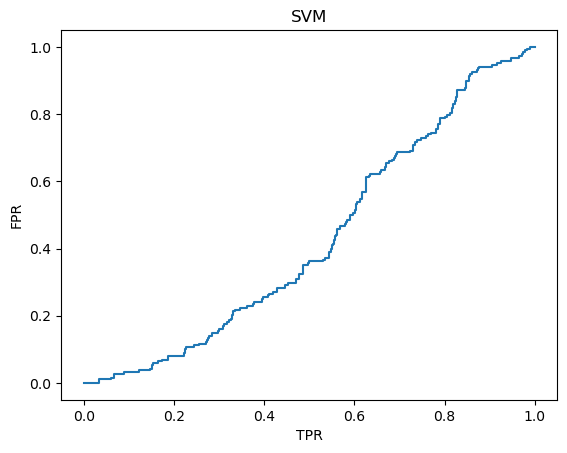

In [86]:
svm_prob=svc.predict_proba(x_test)
svm_df=pd.DataFrame(svm_prob)
svm_fpr,svm_tpr,svm_threshold=roc_curve(y_test,svm_df.iloc[:,1])
plt.plot(svm_fpr,svm_tpr)
plt.title('SVM')
plt.xlabel('TPR')
plt.ylabel('FPR')
plt.show()

# KNN

In [87]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(x_train, y_train)

KNeighborsClassifier()

In [88]:
knn_p = knn.predict(x_test)

In [89]:
knn_acc = knn.score(x_test, y_test)*100
knn_acc

79.03885480572596

In [90]:
print(confusion_matrix(y_test, knn_p))

[[741  49]
 [156  32]]


In [91]:
print(classification_report(y_test, knn_p))


              precision    recall  f1-score   support

           0       0.83      0.94      0.88       790
           1       0.40      0.17      0.24       188

    accuracy                           0.79       978
   macro avg       0.61      0.55      0.56       978
weighted avg       0.74      0.79      0.76       978



In [92]:
knn_pr = precision_score(y_test, knn_p)
knn_re = recall_score(y_test, knn_p)
knn_f1 = f1_score(y_test, knn_p)

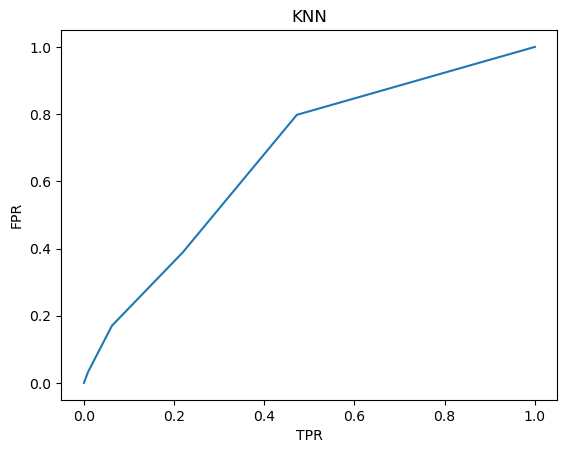

In [93]:
knn_prob=knn.predict_proba(x_test)
knn_df=pd.DataFrame(knn_prob)
knn_fpr,knn_tpr,knn_threshold=roc_curve(y_test,knn_df.iloc[:,1])
plt.plot(knn_fpr,knn_tpr)
plt.title('KNN')
plt.xlabel('TPR')
plt.ylabel('FPR')
plt.show()

# Naive Bayes

In [94]:
from sklearn.naive_bayes import MultinomialNB
nb=MultinomialNB()

In [95]:
nb.fit(x_train,y_train)

MultinomialNB()

In [96]:
n_p=nb.predict(x_test)

In [97]:
nc=confusion_matrix(n_p,y_test)
nc

array([[710, 142],
       [ 80,  46]], dtype=int64)

In [98]:
acc_n=nc.diagonal().sum()/nc.sum()*100
acc_n

77.30061349693251

In [99]:
n_f1=f1_score(n_p,y_test)
n_pe=precision_score(n_p,y_test)
n_re=recall_score(n_p,y_test)

In [100]:
print(classification_report(n_p,y_test))

              precision    recall  f1-score   support

           0       0.90      0.83      0.86       852
           1       0.24      0.37      0.29       126

    accuracy                           0.77       978
   macro avg       0.57      0.60      0.58       978
weighted avg       0.81      0.77      0.79       978



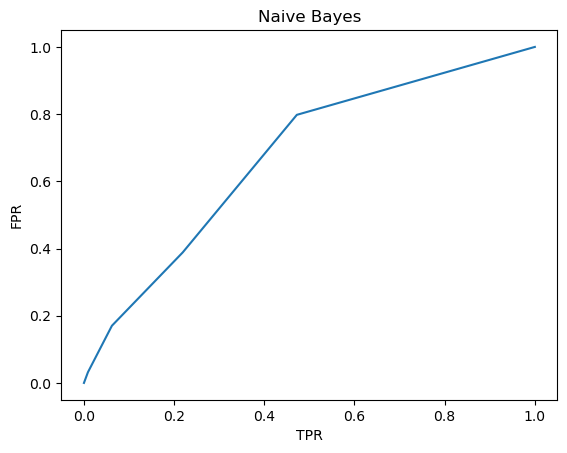

In [101]:
nb_prob=nb.predict_proba(x_test)
nb_df=pd.DataFrame(knn_prob)
nb_fpr,nb_tpr,nb_threshold=roc_curve(y_test,nb_df.iloc[:,1])
plt.plot(nb_fpr,nb_tpr)
plt.title('Naive Bayes')
plt.xlabel('TPR')
plt.ylabel('FPR')
plt.show()

In [102]:
list1=["Logistic Regression","Decision Tree","Random Forest","Ada Boost","XG Boost","SVM","Naive Bayes","knn"]
list2=[lg_acc,dt_acc,rf_acc,ad_acc,xgb_acc,acc_s,acc_n,knn_acc]
list3=[lg_f1,dt_f1,rf_f1,ad_f1,xgb_f1,s_f1,n_f1,knn_f1]
list4=[lg_pe,dt_pe,rf_pe,ad_pe,xgb_pe,s_pe,n_pe,knn_pr]
list5=[lg_re,dt_re,rf_re,ad_re,xgb_re,s_re,n_re,knn_re]

In [103]:
df=pd.DataFrame({"Model Name":list1,"Accuracy":list2,"F1_Score":list3,"Precision_Score":list4,"Recall_Score":list5})
df

,Model Name,Accuracy,F1_Score,Precision_Score,Recall_Score
0,Logistic Regression,82.208589,0.163462,0.090426,0.850000
1,Decision Tree,91.411043,0.785714,0.819149,0.754902
2,Random Forest,92.638037,0.779141,0.675532,0.920290
3,Ada Boost,91.411043,0.784615,0.813830,0.757426
4,XG Boost,94.274029,0.838150,0.771277,0.917722
5,SVM,80.777096,0.000000,0.000000,0.000000
6,Naive Bayes,77.300613,0.292994,0.244681,0.365079
7,knn,79.038855,0.237918,0.395062,0.170213


*Based on the Precision_score,Recall_score and F1_score the accuracy of Random Forest is giving the good model so Random Forest Model is the best fitted model*

# Class Imbalance Treatment

In [104]:
t1.ProdTaken.value_counts()

0    3968
1     920
Name: ProdTaken, dtype: int64

In [105]:
c_0,c_1=t1["ProdTaken"].value_counts()
c_0,c_1

(3968, 920)

In [106]:
c_1,c_0

(920, 3968)

In [107]:
train_0=t1[t1["ProdTaken"]==0]
train_1=t1[t1["ProdTaken"]==1]

In [108]:
# Random oversampling

In [109]:
#class_1over=train_1.sample(c_0,replace=True)

In [110]:
#class1_0=pd.concat([class_1over,train_0],axis=0)

In [111]:
#class1_0.head()
#class1_0.shape  #=>output:(7936, 19)

In [112]:
#class1_0.ProdTaken.value_counts()   #output=>1 - 3968,0 - 3968

*I have used Random oversampling for treating the class imbalance treatment but my models are giving over fited .So I am trying undersampling for geting best fitted Model*

# Random UnderSampleing

In [113]:
class_0under=train_0.sample(c_1)

In [114]:
class1_0=pd.concat([class_0under,train_1],axis=0)
class1_0.head(1)

,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
618,0,61.0,1,1,8.0,3,2,3,1.0,0,5.0,2,1.0,0,2,1,2.0,1,18424.0


In [115]:
class1_0.shape

(1840, 19)

In [116]:
class1_0.ProdTaken.value_counts()

0    920
1    920
Name: ProdTaken, dtype: int64

# Treating Outlier and skewness

<AxesSubplot:>

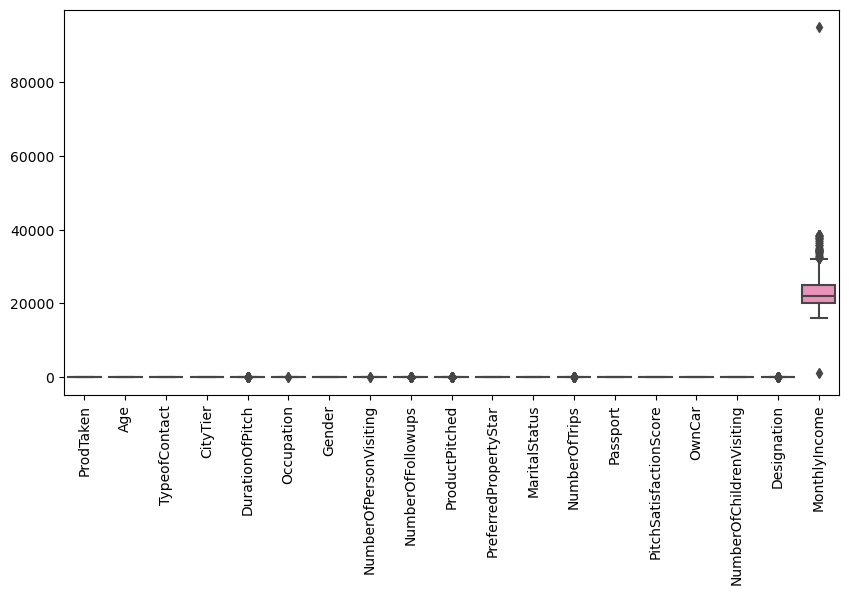

In [117]:
fig=plt.figure(figsize=(10,5))
plt.xticks(rotation=90)
sns.boxplot(data=class1_0)

In [118]:
class1_0.columns

Index(['ProdTaken', 'Age', 'TypeofContact', 'CityTier', 'DurationOfPitch',
       'Occupation', 'Gender', 'NumberOfPersonVisiting', 'NumberOfFollowups',
       'ProductPitched', 'PreferredPropertyStar', 'MaritalStatus',
       'NumberOfTrips', 'Passport', 'PitchSatisfactionScore', 'OwnCar',
       'NumberOfChildrenVisiting', 'Designation', 'MonthlyIncome'],
      dtype='object')

In [119]:
### Age

In [120]:
#sns.histplot(class1_0.Age)

In [121]:
#sns.distplot(class1_0.Age)

In [122]:
#sns.boxplot(data=class1_0,y='Age')

In [123]:
#class1_0.Age.skew()

In [124]:
#ub=class1_0['Age'].mean()+3*class1_0['Age'].std()
#lb=class1_0['Age'].mean()-3*class1_0['Age'].std()
#print(lb,ub)

In [125]:
#imputation
#class1_0.loc[class1_0['Age']>64,'Age']=64

In [126]:
#sns.distplot(class1_0.Age)

### DurationOfPitch

<AxesSubplot:xlabel='DurationOfPitch', ylabel='Count'>

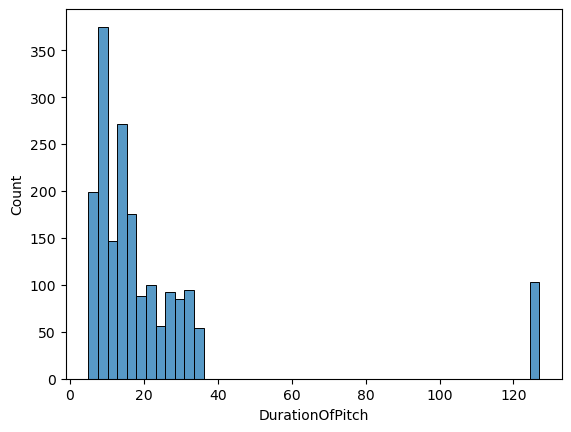

In [127]:
sns.histplot(class1_0.DurationOfPitch)

<AxesSubplot:xlabel='DurationOfPitch', ylabel='Density'>

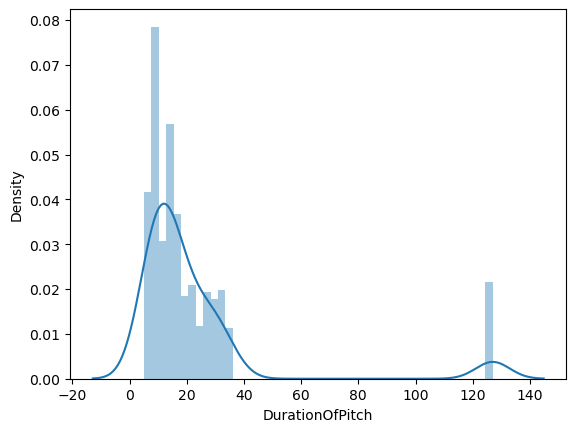

In [128]:
sns.distplot(class1_0.DurationOfPitch)

<AxesSubplot:ylabel='DurationOfPitch'>

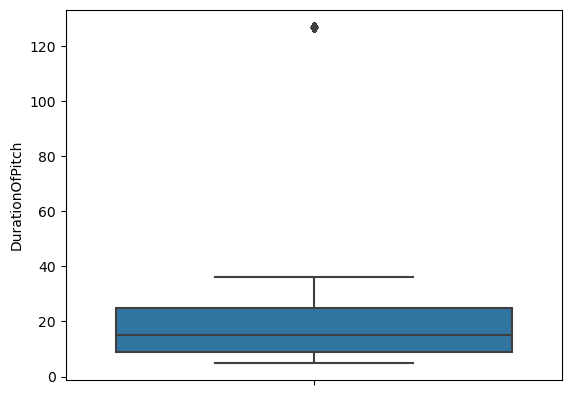

In [129]:
sns.boxplot(data=class1_0,y='DurationOfPitch')

In [130]:
class1_0.DurationOfPitch.skew()

3.3072197217285675

In [131]:
iqr=class1_0.DurationOfPitch.quantile(0.75)-class1_0.DurationOfPitch.quantile(0.25)
iqr

16.0

In [132]:
lb=class1_0.DurationOfPitch.quantile(0.25)-(iqr*3)
ub=class1_0.DurationOfPitch.quantile(0.75)+(iqr*3)
print(lb,ub)

-39.0 73.0


In [133]:
class1_0.loc[class1_0['DurationOfPitch']>73,'DurationOfPitch']=73

<AxesSubplot:xlabel='DurationOfPitch', ylabel='Density'>

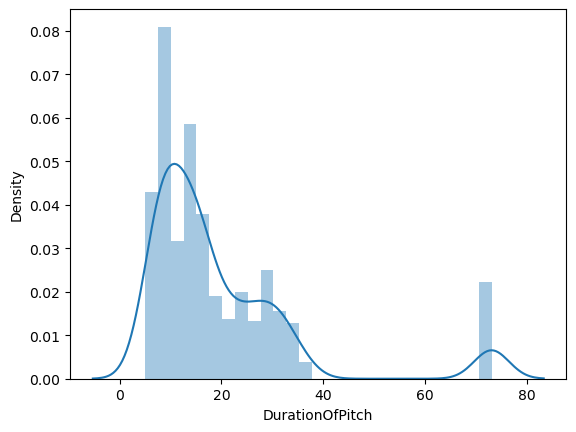

In [134]:
sns.distplot(class1_0.DurationOfPitch)

### Occupation

<AxesSubplot:xlabel='Occupation', ylabel='Count'>

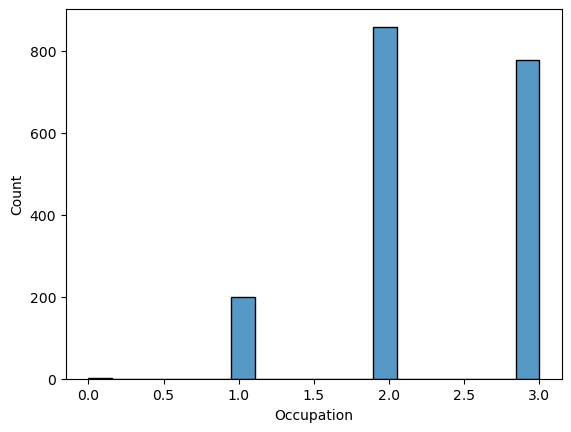

In [135]:
sns.histplot(class1_0.Occupation)

### NumberOfPersonVisiting

<AxesSubplot:xlabel='NumberOfPersonVisiting', ylabel='Count'>

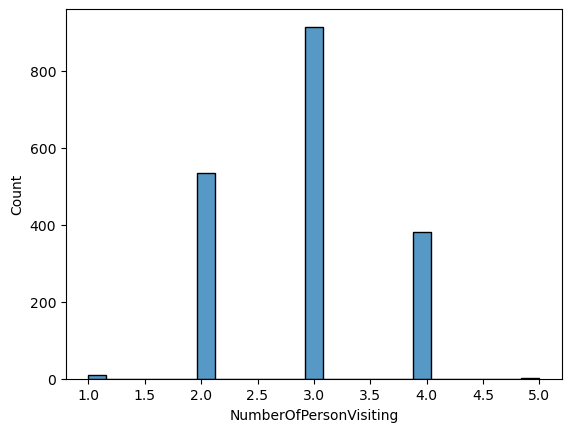

In [136]:
sns.histplot(class1_0.NumberOfPersonVisiting)

### NumberOfFollowups

<AxesSubplot:xlabel='NumberOfFollowups', ylabel='Count'>

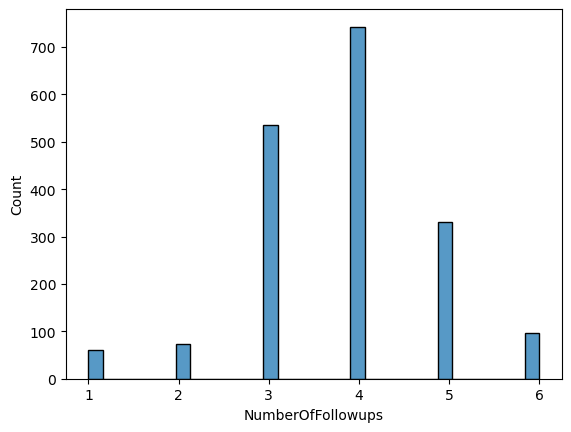

In [137]:
sns.histplot(class1_0.NumberOfFollowups)

### ProductPitched

<AxesSubplot:xlabel='ProductPitched', ylabel='Count'>

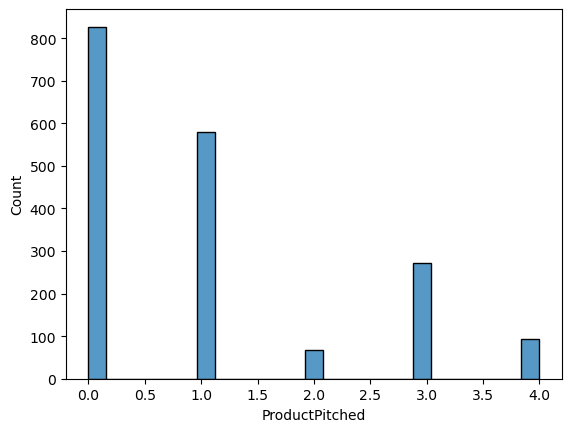

In [138]:
sns.histplot(class1_0.ProductPitched)

### MonthlyIncome

<AxesSubplot:xlabel='MonthlyIncome', ylabel='Count'>

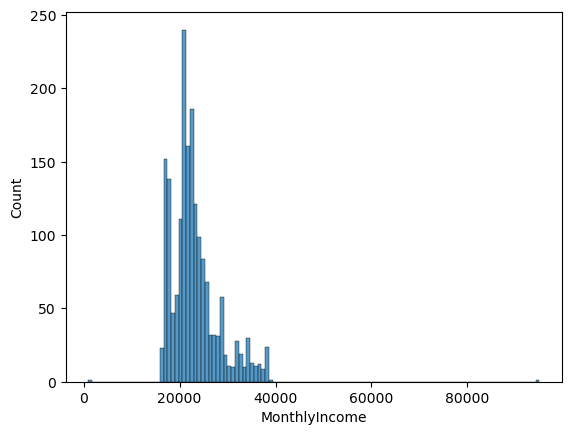

In [139]:
sns.histplot(class1_0.MonthlyIncome)

<AxesSubplot:xlabel='MonthlyIncome', ylabel='Density'>

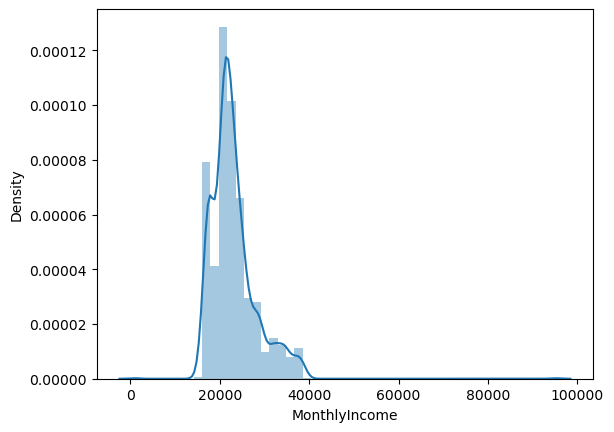

In [140]:
sns.distplot(class1_0.MonthlyIncome)

<AxesSubplot:ylabel='MonthlyIncome'>

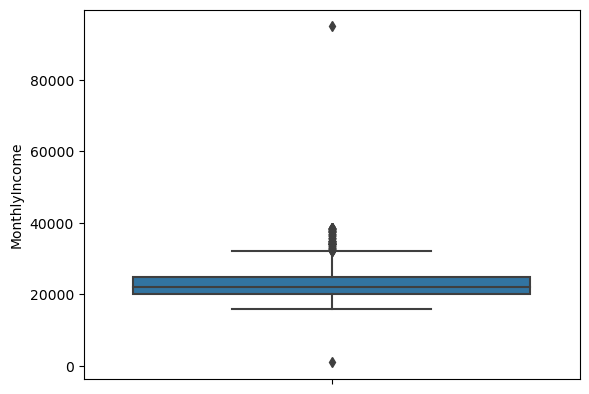

In [141]:
sns.boxplot(data=class1_0,y='MonthlyIncome')

In [142]:
class1_0.MonthlyIncome.skew()

2.4230991155729016

In [143]:
iqr=class1_0.MonthlyIncome.quantile(0.75)-class1_0.MonthlyIncome.quantile(0.25)
iqr

4811.0

In [144]:
lb=class1_0.MonthlyIncome.quantile(0.25)-(iqr*3)
ub=class1_0.MonthlyIncome.quantile(0.75)+(iqr*3)
print(lb,ub)

5682.25 39359.25


In [145]:
class1_0.loc[class1_0['MonthlyIncome']>39359,'MonthlyIncome']=39359

In [146]:
class1_0.loc[class1_0['MonthlyIncome']<5682,'MonthlyIncome']=5682

## Skewness

In [147]:
class1_0.skew()

ProdTaken                   0.000000
Age                         0.520520
TypeofContact              -0.856706
CityTier                    0.557379
DurationOfPitch             2.320292
Occupation                 -0.467901
Gender                     -0.885241
NumberOfPersonVisiting      0.071525
NumberOfFollowups          -0.245342
ProductPitched              1.042981
PreferredPropertyStar       0.713484
MaritalStatus               0.305895
NumberOfTrips               3.798472
Passport                    0.422489
PitchSatisfactionScore     -0.152215
OwnCar                     -0.481094
NumberOfChildrenVisiting    0.277592
Designation                 0.589750
MonthlyIncome               1.160672
dtype: float64

In [148]:
class1_0.loc[class1_0['DurationOfPitch']==0]

,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome


In [149]:
class1_0.DurationOfPitch=np.log(class1_0.DurationOfPitch)

In [150]:
class1_0.MonthlyIncome=np.sqrt(class1_0.MonthlyIncome)

In [151]:
class1_0.skew()

ProdTaken                   0.000000
Age                         0.520520
TypeofContact              -0.856706
CityTier                    0.557379
DurationOfPitch             0.624576
Occupation                 -0.467901
Gender                     -0.885241
NumberOfPersonVisiting      0.071525
NumberOfFollowups          -0.245342
ProductPitched              1.042981
PreferredPropertyStar       0.713484
MaritalStatus               0.305895
NumberOfTrips               3.798472
Passport                    0.422489
PitchSatisfactionScore     -0.152215
OwnCar                     -0.481094
NumberOfChildrenVisiting    0.277592
Designation                 0.589750
MonthlyIncome               0.863690
dtype: float64

# Feture selection
### Recursive Feature Elimination 

In [152]:
from sklearn.feature_selection import RFE
from sklearn.tree import DecisionTreeClassifier
dTree = DecisionTreeClassifier()

In [153]:
rfe=RFE(dTree)

In [154]:
rfe.fit(class1_0.iloc[:,1:],class1_0.iloc[:,0])

RFE(estimator=DecisionTreeClassifier())

In [155]:
rfe.support_

array([ True, False,  True,  True, False, False, False, False,  True,
       False,  True,  True,  True,  True, False, False, False,  True])

In [156]:
fe_df=pd.DataFrame({"Score":list(rfe.support_),"columns":list(t1.iloc[:,1:])})
fe_df

,Score,columns
0,True,Age
1,False,TypeofContact
2,True,CityTier
3,True,DurationOfPitch
4,False,Occupation
5,False,Gender
6,False,NumberOfPersonVisiting
7,False,NumberOfFollowups
8,True,ProductPitched
9,False,PreferredPropertyStar


In [157]:
t2=class1_0.drop(['TypeofContact','Occupation','Gender','NumberOfPersonVisiting','NumberOfFollowups','PreferredPropertyStar','OwnCar','NumberOfChildrenVisiting','Designation'],axis=1)
t2.head(2)

,ProdTaken,Age,CityTier,DurationOfPitch,ProductPitched,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,MonthlyIncome
618,0,61.0,1,2.079442,0,2,1.0,0,2,135.735036
2233,0,34.0,3,2.772589,0,1,2.0,1,1,131.224998


# Model After EDA(Outlier,skewness,Feature Selection)

In [158]:
f_y=t2.iloc[:,0]
f_x=t2.iloc[:,1:]

In [159]:
f_x.shape,f_y.shape

((1840, 9), (1840,))

In [160]:
f_x_train,f_x_test,f_y_train,f_y_test=train_test_split(f_x,f_y,test_size=0.2,random_state=100)
f_x_train.shape,f_x_test.shape,f_y_train.shape,f_y_test.shape


((1472, 9), (368, 9), (1472,), (368,))

# Logistic Regression

In [161]:
lg.fit(f_x_train,f_y_train)

LogisticRegression()

In [162]:
f_p1=lg.predict(f_x_test)

In [163]:
f_cf=confusion_matrix(f_p1,f_y_test)
f_cf

array([[135,  60],
       [ 48, 125]], dtype=int64)

In [164]:
f_a1=f_cf.diagonal().sum()/f_cf.sum()*100
f_a1

70.65217391304348

In [165]:
f_lg_f1=f1_score(f_p1,f_y_test)
f_lg_pe=precision_score(f_p1,f_y_test)
f_lg_re=recall_score(f_p1,f_y_test)

In [166]:
print(classification_report(f_p1,f_y_test))

              precision    recall  f1-score   support

           0       0.74      0.69      0.71       195
           1       0.68      0.72      0.70       173

    accuracy                           0.71       368
   macro avg       0.71      0.71      0.71       368
weighted avg       0.71      0.71      0.71       368



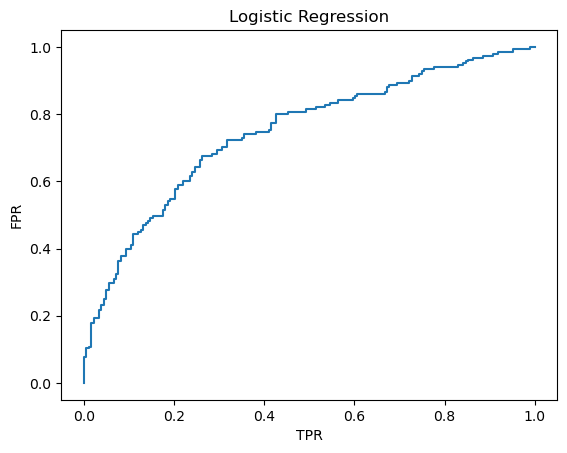

In [167]:
lg1_prob=lg.predict_proba(f_x_test)
lg1_df=pd.DataFrame(lg1_prob)
lg1_fpr,lg1_tpr,lg1_threshold=roc_curve(f_y_test,lg1_df.iloc[:,1])
plt.plot(lg1_fpr,lg1_tpr)
plt.title('Logistic Regression')
plt.xlabel('TPR')
plt.ylabel('FPR')
plt.show()

# Decision Tree

In [168]:
dt.fit(f_x_train,f_y_train)

DecisionTreeClassifier()

In [169]:
f_dt_p=dt.predict(f_x_test)

In [170]:
f_dt_cf=confusion_matrix(f_dt_p,f_y_test)
f_dt_cf

array([[131,  31],
       [ 52, 154]], dtype=int64)

In [171]:
f_dt_acc=f_dt_cf.diagonal().sum()/f_dt_cf.sum()*100
f_dt_acc

77.44565217391305

In [172]:
f_dt_f1=f1_score(f_dt_p,f_y_test)
f_dt_pe=precision_score(f_dt_p,f_y_test)
f_dt_re=recall_score(f_dt_p,f_y_test)

In [173]:
print(classification_report(f_dt_p,f_y_test))

              precision    recall  f1-score   support

           0       0.72      0.81      0.76       162
           1       0.83      0.75      0.79       206

    accuracy                           0.77       368
   macro avg       0.77      0.78      0.77       368
weighted avg       0.78      0.77      0.78       368



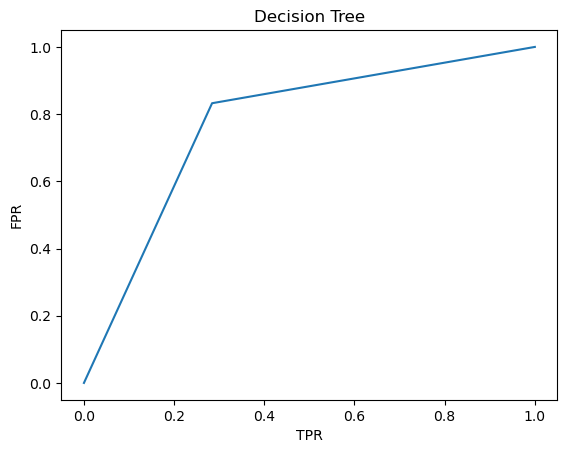

In [174]:
dt1_prob=dt.predict_proba(f_x_test)
dt1_df=pd.DataFrame(dt1_prob)
dt1_fpr,dt1_tpr,dt1_threshold=roc_curve(f_y_test,dt1_df.iloc[:,1])
plt.plot(dt1_fpr,dt1_tpr)
plt.title('Decision Tree')
plt.xlabel('TPR')
plt.ylabel('FPR')
plt.show()

# Random Forest

In [175]:
rf.fit(f_x_train,f_y_train)

RandomForestClassifier()

In [176]:
f_rf_p=rf.predict(f_x_test)

In [177]:
f_rf_cf=confusion_matrix(f_rf_p,f_y_test)
f_rf_cf

array([[153,  23],
       [ 30, 162]], dtype=int64)

In [178]:
f_rf_acc=f_rf_cf.diagonal().sum()/f_rf_cf.sum()*100
f_rf_acc

85.59782608695652

In [179]:
f_rf_f1=f1_score(f_rf_p,f_y_test)
f_rf_pe=precision_score(f_rf_p,f_y_test)
f_rf_re=recall_score(f_rf_p,f_y_test)

In [180]:
print(classification_report(f_rf_p,f_y_test))

              precision    recall  f1-score   support

           0       0.84      0.87      0.85       176
           1       0.88      0.84      0.86       192

    accuracy                           0.86       368
   macro avg       0.86      0.86      0.86       368
weighted avg       0.86      0.86      0.86       368



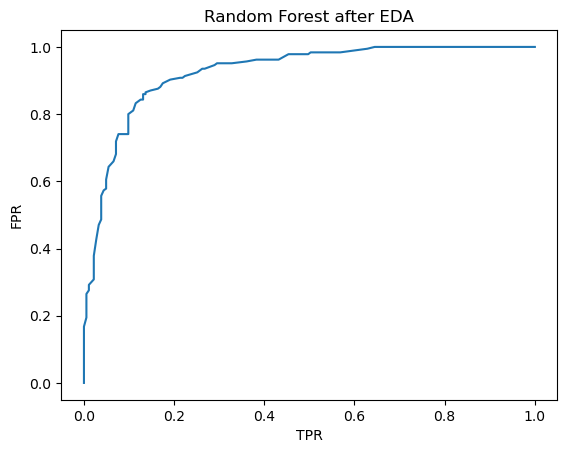

In [181]:
rf1_prob=rf.predict_proba(f_x_test)
rf1_df=pd.DataFrame(rf1_prob)
rf1_fpr,rf1_tpr,rf1_threshold=roc_curve(f_y_test,rf1_df.iloc[:,1])
plt.plot(rf1_fpr,rf1_tpr)
plt.title('Random Forest after EDA')
plt.xlabel('TPR')
plt.ylabel('FPR')
plt.show()

# Ada boost

In [182]:
adbo.fit(f_x_train,f_y_train)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(), n_estimators=5)

In [183]:
f_ad_p=adbo.predict(f_x_test)

In [184]:
f_ad_cf=confusion_matrix(f_ad_p,f_y_test)
f_ad_cf

array([[135,  27],
       [ 48, 158]], dtype=int64)

In [185]:
f_ad_acc=f_ad_cf.diagonal().sum()/f_ad_cf.sum()*100
f_ad_acc

79.61956521739131

In [186]:
f_ad_f1=f1_score(f_ad_p,f_y_test)
f_ad_pe=precision_score(f_ad_p,f_y_test)
f_ad_re=recall_score(f_ad_p,f_y_test)

In [187]:
print(classification_report(f_ad_p,f_y_test))

              precision    recall  f1-score   support

           0       0.74      0.83      0.78       162
           1       0.85      0.77      0.81       206

    accuracy                           0.80       368
   macro avg       0.80      0.80      0.80       368
weighted avg       0.80      0.80      0.80       368



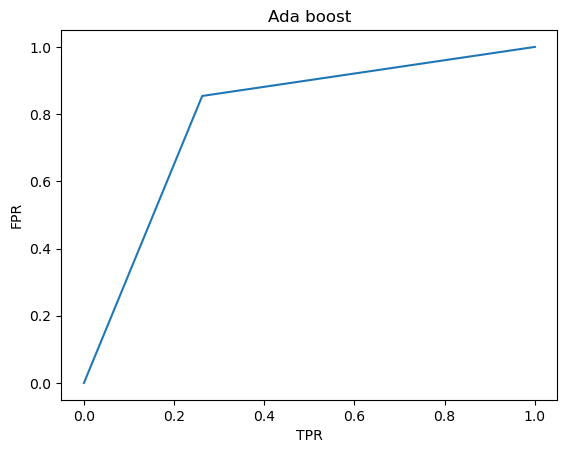

In [188]:
ad1_prob=adbo.predict_proba(f_x_test)
ad1_df=pd.DataFrame(ad1_prob)
ad1_fpr,ad1_tpr,ad1_threshold=roc_curve(f_y_test,ad1_df.iloc[:,1])
plt.plot(ad1_fpr,ad1_tpr)
plt.title('Ada boost')
plt.xlabel('TPR')
plt.ylabel('FPR')
plt.show()

# XG boost

In [189]:
xgb.fit(f_x_train,f_y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [190]:
f_xgb_p=xgb.predict(f_x_test)

In [191]:
f_xgb_cf=confusion_matrix(f_xgb_p,f_y_test)
f_xgb_cf

array([[145,  28],
       [ 38, 157]], dtype=int64)

In [192]:
f_xgb_acc=f_xgb_cf.diagonal().sum()/f_xgb_cf.sum()*100
f_xgb_acc

82.06521739130434

In [193]:
f_xgb_f1=f1_score(f_xgb_p,f_y_test)
f_xgb_pe=precision_score(f_xgb_p,f_y_test)
f_xgb_re=recall_score(f_xgb_p,f_y_test)

In [194]:
print(classification_report(f_xgb_p,f_y_test))

              precision    recall  f1-score   support

           0       0.79      0.84      0.81       173
           1       0.85      0.81      0.83       195

    accuracy                           0.82       368
   macro avg       0.82      0.82      0.82       368
weighted avg       0.82      0.82      0.82       368



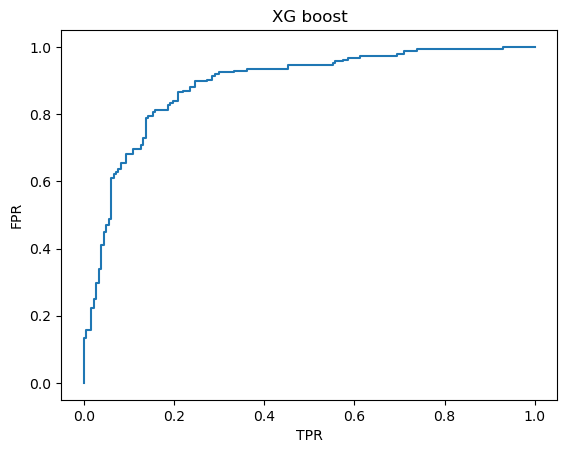

In [195]:
xg1_prob=xgb.predict_proba(f_x_test)
xg1_df=pd.DataFrame(xg1_prob)
xg1_fpr,xg1_tpr,xg1_threshold=roc_curve(f_y_test,xg1_df.iloc[:,1])
plt.plot(xg1_fpr,xg1_tpr)
plt.title('XG boost')
plt.xlabel('TPR')
plt.ylabel('FPR')
plt.show()

# SVM

In [196]:
svc.fit(f_x_train,f_y_train)

SVC(probability=True)

In [197]:
f_s_p=svc.predict(f_x_test)

In [198]:
f_svm_cf=confusion_matrix(f_s_p,f_y_test)
f_svm_cf

array([[103,  82],
       [ 80, 103]], dtype=int64)

In [199]:
f_acc_s=f_svm_cf.diagonal().sum()/f_svm_cf.sum()*100
f_acc_s

55.97826086956522

In [200]:
f_s_f1=f1_score(f_s_p,f_y_test)
f_s_pe=precision_score(f_s_p,f_y_test)
f_s_re=recall_score(f_s_p,f_y_test)

In [201]:
print(classification_report(f_s_p,f_y_test))

              precision    recall  f1-score   support

           0       0.56      0.56      0.56       185
           1       0.56      0.56      0.56       183

    accuracy                           0.56       368
   macro avg       0.56      0.56      0.56       368
weighted avg       0.56      0.56      0.56       368



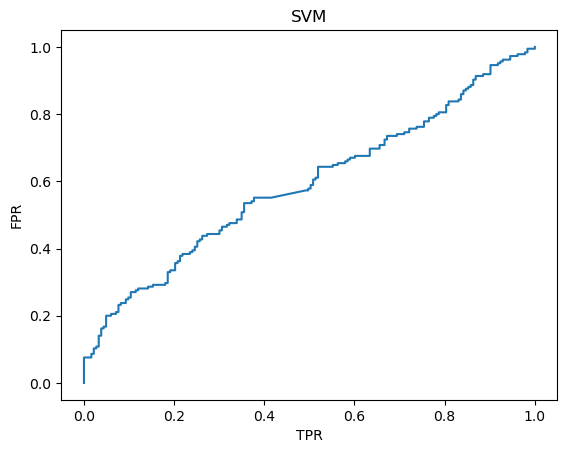

In [202]:
svm1_prob=svc.predict_proba(f_x_test)
svm1_df=pd.DataFrame(svm1_prob)
svm1_fpr,svm1_tpr,svm1_threshold=roc_curve(f_y_test,svm1_df.iloc[:,1])
plt.plot(svm1_fpr,svm1_tpr)
plt.title('SVM')
plt.xlabel('TPR')
plt.ylabel('FPR')
plt.show()

# Navie

In [203]:
nb.fit(f_x_train,f_y_train)

MultinomialNB()

In [204]:
f_n_p=nb.predict(f_x_test)

In [205]:
f_nc=confusion_matrix(f_n_p,f_y_test)
f_nc

array([[104,  61],
       [ 79, 124]], dtype=int64)

In [206]:
f_acc_n=f_nc.diagonal().sum()/f_nc.sum()*100
f_acc_n

61.95652173913043

In [207]:
f_n_f1=f1_score(f_n_p,f_y_test)
f_n_pe=precision_score(f_n_p,f_y_test)
f_n_re=recall_score(f_n_p,f_y_test)

In [208]:
print(classification_report(f_n_p,f_y_test))

              precision    recall  f1-score   support

           0       0.57      0.63      0.60       165
           1       0.67      0.61      0.64       203

    accuracy                           0.62       368
   macro avg       0.62      0.62      0.62       368
weighted avg       0.62      0.62      0.62       368



# Knn

In [209]:
knn.fit(f_x_train, f_y_train)

KNeighborsClassifier()

In [210]:
knn_p = knn.predict(f_x_test)

In [211]:
knn_acc = knn.score(f_x_test, f_y_test)*100
knn_acc

61.684782608695656

In [212]:
print(confusion_matrix(f_y_test, knn_p))

[[112  71]
 [ 70 115]]


In [213]:
print(classification_report(f_y_test, knn_p))

              precision    recall  f1-score   support

           0       0.62      0.61      0.61       183
           1       0.62      0.62      0.62       185

    accuracy                           0.62       368
   macro avg       0.62      0.62      0.62       368
weighted avg       0.62      0.62      0.62       368



In [214]:
knn_pr = precision_score(f_y_test, knn_p)
knn_re = recall_score(f_y_test, knn_p)
knn_f1 = f1_score(f_y_test, knn_p)

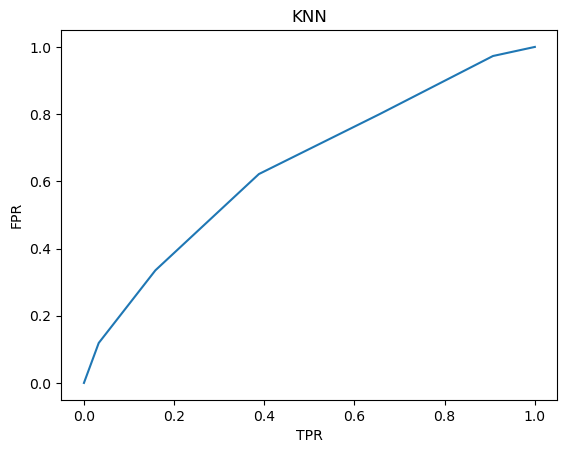

In [215]:
knn1_prob=knn.predict_proba(f_x_test)
knn1_df=pd.DataFrame(knn1_prob)
knn1_fpr,knn1_tpr,knn1_threshold=roc_curve(f_y_test,knn1_df.iloc[:,1])
plt.plot(knn1_fpr,knn1_tpr)
plt.title('KNN')
plt.xlabel('TPR')
plt.ylabel('FPR')
plt.show()

In [216]:
f_list1=["Logistic Regression","Decision Tree","Random Forest","Ada Boost","XG Boost","SVM","Naive Bayes"]
f_list2=[f_a1,f_dt_acc,f_rf_acc,f_ad_acc,f_xgb_acc,f_acc_s,f_acc_n]
f_list3=[f_lg_f1,f_dt_f1,f_rf_f1,f_ad_f1,f_xgb_f1,f_s_f1,f_n_f1]
f_list4=[f_lg_pe,f_dt_pe,f_rf_pe,f_ad_pe,f_xgb_pe,f_s_pe,f_n_pe]
f_list5=[f_lg_re,f_dt_re,f_rf_re,f_ad_re,f_xgb_re,f_s_re,f_n_re]

In [217]:
f_df=pd.DataFrame({"Model Name":f_list1,"Accuracy":f_list2,"F1_Score":f_list3,"Precision_Score":f_list4,"Recall_Score":f_list5})
f_df

,Model Name,Accuracy,F1_Score,Precision_Score,Recall_Score
0,Logistic Regression,70.652174,0.698324,0.675676,0.722543
1,Decision Tree,77.445652,0.787724,0.832432,0.747573
2,Random Forest,85.597826,0.859416,0.875676,0.843750
3,Ada Boost,79.619565,0.808184,0.854054,0.766990
4,XG Boost,82.065217,0.826316,0.848649,0.805128
5,SVM,55.978261,0.559783,0.556757,0.562842
6,Naive Bayes,61.956522,0.639175,0.670270,0.610837


# Graphical Representation Of Output

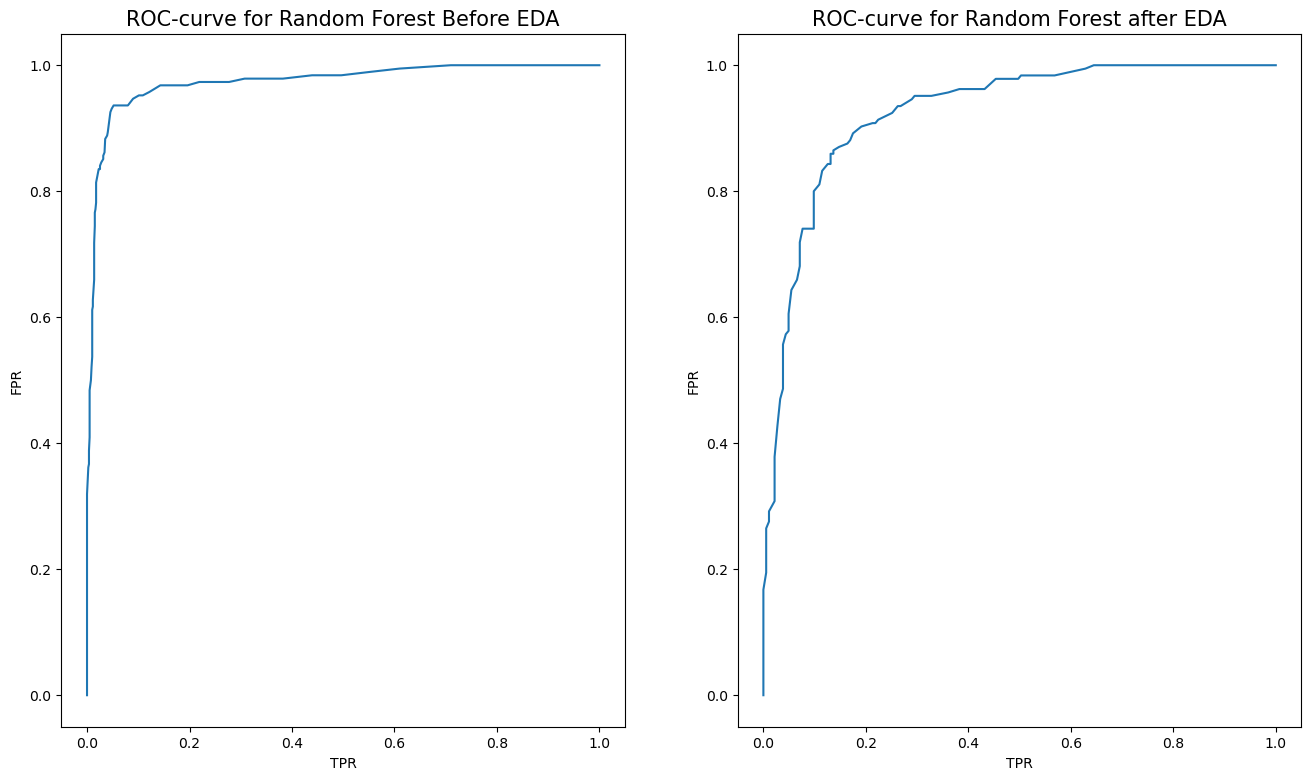

In [218]:
plt.figure(figsize=(16,9))
plt.subplot(121)
plt.plot(rf_fpr,rf_tpr)
plt.title('ROC-curve for Random Forest Before EDA', fontsize=15)
plt.xlabel('TPR')
plt.ylabel('FPR')

plt.subplot(122)
plt.plot(rf1_fpr,rf1_tpr)
plt.title('ROC-curve for Random Forest after EDA', fontsize=15)
plt.xlabel('TPR')
plt.ylabel('FPR')

plt.show()

### Data frames

In [219]:
df  # Base Model Before EDA

,Model Name,Accuracy,F1_Score,Precision_Score,Recall_Score
0,Logistic Regression,82.208589,0.163462,0.090426,0.850000
1,Decision Tree,91.411043,0.785714,0.819149,0.754902
2,Random Forest,92.638037,0.779141,0.675532,0.920290
3,Ada Boost,91.411043,0.784615,0.813830,0.757426
4,XG Boost,94.274029,0.838150,0.771277,0.917722
5,SVM,80.777096,0.000000,0.000000,0.000000
6,Naive Bayes,77.300613,0.292994,0.244681,0.365079
7,knn,79.038855,0.237918,0.395062,0.170213


In [220]:
f_df  #Model After EDA

,Model Name,Accuracy,F1_Score,Precision_Score,Recall_Score
0,Logistic Regression,70.652174,0.698324,0.675676,0.722543
1,Decision Tree,77.445652,0.787724,0.832432,0.747573
2,Random Forest,85.597826,0.859416,0.875676,0.843750
3,Ada Boost,79.619565,0.808184,0.854054,0.766990
4,XG Boost,82.065217,0.826316,0.848649,0.805128
5,SVM,55.978261,0.559783,0.556757,0.562842
6,Naive Bayes,61.956522,0.639175,0.670270,0.610837


# Cross Validation

In [221]:
from sklearn.model_selection import cross_val_score,KFold

In [222]:
Y1=t2.iloc[:,0]
X1=t2.iloc[:,1:19]

In [223]:
kf=KFold(n_splits=5)
score=cross_val_score(rf,X1,Y1,cv=kf)
print("Cross Validation Scores are {}".format(score))
print("Average Cross Validation score of Random Forest:{}".format(score.mean()))

Cross Validation Scores are [0.68206522 0.73641304 0.87228261 0.81793478 0.54076087]
Average Cross Validation score of Random Forest:0.7298913043478261
